Task 4:

You want to observe the total activity in time. 


What is this activity? Plot the different values in time. 
    
    – What is an « active » neuron?
    – What is an « active » network?
    – What is the activity of a neuron? of a network?


You want to observe the total duration of the network in time. 


What is this duration? Print its value. 
    
    – Duration of spiking activity of the network?
    – How do you consider the delay to reach network output?

Definitions and terms: 


To observe the total activity in time, we can track the activation of neurons and the network over a certain duration. 

An active neuron refers to a neuron that has fired an output spike during a specific time interval. In the code provided, a neuron is considered active if its membrane potential exceeds the threshold, resulting in an activation value of 1.

An active network refers to a network where at least one neuron in the output layer has fired an output spike during a specific time interval. In other words, if any output neuron has an activation value of 1, the network is considered active.

The activity of a neuron refers to the firing behavior of the neuron over time. It represents the number of times a neuron fires or becomes active within a given duration.

The activity of a network refers to the overall firing behavior of the network over time. It represents the presence or absence of output spikes from the network during a given duration.



In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class Neuron:
    def __init__(self, weights, threshold):
        self.weights = weights  #The weights of the neuron's connections
        self.threshold = threshold  #The threshold for firing
        self.membrane_potential = 0.0  #The accumulated input signal
        self.activation = 0  #The output activation state

    def integrate_fire(self, inputs):
        #We integrate the inputs by summing weighted values.
        self.membrane_potential += np.dot(inputs, self.weights)

        #We check if any element in the membrane potential array exceeds the threshold.
        if np.any(self.membrane_potential > self.threshold):
            #We fire an output spike,
            self.activation = 1
            #and reset the membrane potential.
            self.membrane_potential = 0.0
        else:
            self.activation = 0
            
        #It tracks the activity of the neuron.
        activity = int(self.activation)  #1 if active, 0 otherwise
        return activity

In [4]:
class NeuralNetwork:
    def __init__(self, input_neurons, hidden_neurons, output_neurons, threshold_hidden, threshold_output):
        self.input_neurons = input_neurons  
        self.hidden_neurons = hidden_neurons  
        self.output_neurons = output_neurons 
        self.threshold_hidden = threshold_hidden  
        self.threshold_output = threshold_output 
        self.hidden_weights = np.random.random((hidden_neurons, input_neurons)) 
        self.output_weights = np.random.random((output_neurons, hidden_neurons)) 

    def forward(self, inputs): #We define function forward.
        hidden_outputs = self.activate_layer(inputs, self.hidden_weights, self.threshold_hidden)  #We activate hidden layer.
        output_outputs = self.activate_layer(hidden_outputs, self.output_weights, self.threshold_output)  #We activate output layer.
        
        #It tracks the activity of the network.
        network_activity = np.any(output_outputs)  #1 if active, 0 otherwise
        
        return output_outputs, network_activity

    def activate_layer(self, inputs, weights, threshold):
        activations = []
        for neuron_weights in weights:
            neuron = Neuron(neuron_weights, threshold)  # Create a neuron with given weights and threshold
            neuron_output = neuron.integrate_fire(inputs)  # Integrate inputs and update neuron's activation state
            activations.append(neuron_output)  # Add neuron's activation to the list of activations
        return np.array(activations)

Network Outputs: [1 1]
Network Activity: True


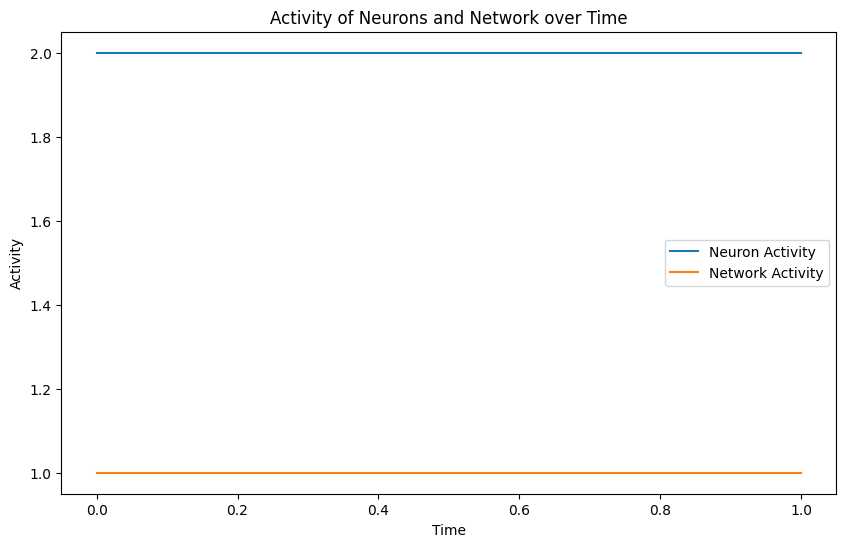

In [5]:
#We define the number of neurons per layer.
input_neurons = 2
hidden_neurons = 4
output_neurons = 2

#We define the training dataset.
inputs = np.array([[0.0, 0.0], [0.0, 1.0], [1.0, 1.0], [0.0, 0.0]])

#Here we create the neural network,
network = NeuralNetwork(input_neurons, hidden_neurons, output_neurons, threshold_hidden=0.5, threshold_output=0.5)

#and test it.
outputs, network_activity = network.forward(inputs)
print("Network Outputs:", outputs)
print("Network Activity:", network_activity)

#Here we plot the activity of the network over time
time = np.arange(len(outputs)) #We create an array representing the time steps
neuron_activities = np.array([network.output_neurons] * len(outputs)).T
network_activities = np.array([network_activity] * len(outputs))

plt.figure(figsize=(10, 6))  #We create a new figure for the plot
plt.plot(time, neuron_activities, label='Neuron Activity')  #We plot the neuron activity over time
plt.plot(time, network_activities, label='Network Activity')  #We plot the network activity over time
plt.xlabel('Time')  #We set the x-axis label,
plt.ylabel('Activity')  #and the y-axis label.
plt.title('Activity of Neurons and Network over Time')  #We name the plot,
plt.legend()  #display the legend,
plt.show()  #and show the plot.

In [7]:
print("Duration of Spiking Activity:", len(outputs)) #We print the value of the duration of spiking activity of the network

#It can be determined by the length of the outputs array, 
#which represents the network's output over time.

Duration of Spiking Activity: 2
